# ECG Heartbeat Signal Classification Using Machine Learning (ML)

- The ML project make use of machine learning methods such as Convolutional Neural Networks, normalization techniques, and ADASYN technique to classify ECG Heartbeat Signals into five different classes. (0-N, 1-S, 2-V, 3-F, 4-Q)

In [1]:
#importing standard libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#ECG (Arrhythmia) Training Data
ecg_arrh_train = pd.read_csv('mitbih_train.csv', header=None)

In [3]:
#ECG (Arrhythmia) Test Data
ecg_arrh_test = pd.read_csv('mitbih_test.csv', header=None)

In [4]:
#Rows and Columns in the Training Data
print('MIT-BIH Arrhythmia Training Data Shape\n There are',ecg_arrh_train.shape[0],'rows and',ecg_arrh_train.shape[1],'columns')

MIT-BIH Arrhythmia Training Data Shape
 There are 87554 rows and 188 columns


In [5]:
#Rows and Columns in the Test Data
print('MIT-BIH Arrhythmia Test Data Shape\n There are',ecg_arrh_test.shape[0],'rows and',ecg_arrh_test.shape[1],'columns')

MIT-BIH Arrhythmia Test Data Shape
 There are 21892 rows and 188 columns


# Training and Test Data Overview

In [6]:
#Training Data
ecg_arrh_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Training Data
ecg_arrh_test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.797260,0.320548,0.043836,0.049315,0.065753,0.030137,0.008219,0.005479,0.010959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.909408,0.975610,0.533101,0.134146,0.066202,0.000000,0.010453,0.012195,0.031359,0.146341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.927803,0.866359,0.299539,0.000000,0.231951,0.317972,0.274962,0.262673,0.270353,0.268817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.914230,0.473684,0.000000,0.064327,0.317739,0.405458,0.391813,0.382066,0.401559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis (EDA)

## Data Information

In [8]:
#Training Data information
ecg_arrh_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [9]:
#Test Data information
ecg_arrh_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


### Insight 1: 
The data (features and target) in both training and test data are of the datatype float. 

## Statistical Analysis

In [10]:
#Training Data statistical analysis
ecg_arrh_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,87554.0,0.890360,0.240909,0.0,0.921922,0.991342,1.000000,1.0
1,87554.0,0.758160,0.221813,0.0,0.682486,0.826013,0.910506,1.0
2,87554.0,0.423972,0.227305,0.0,0.250969,0.429472,0.578767,1.0
3,87554.0,0.219104,0.206878,0.0,0.048458,0.166000,0.341727,1.0
4,87554.0,0.201127,0.177058,0.0,0.082329,0.147878,0.258993,1.0
...,...,...,...,...,...,...,...,...
183,87554.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87554.0,0.003221,0.034789,0.0,0.000000,0.000000,0.000000,1.0
185,87554.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
186,87554.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


In [11]:
#Test Data statistical analysis
ecg_arrh_test.describe().T

,count,mean,std,min,25%,50%,75%,max
0,21892.0,0.894410,0.234560,0.0,0.924260,0.990431,1.000000,1.000000
1,21892.0,0.761902,0.218659,0.0,0.683366,0.828996,0.912319,1.000000
2,21892.0,0.426627,0.228572,0.0,0.251197,0.432777,0.583991,1.000000
3,21892.0,0.221596,0.208711,0.0,0.050505,0.167630,0.347092,1.000000
4,21892.0,0.201676,0.177727,0.0,0.082873,0.147642,0.259211,1.000000
...,...,...,...,...,...,...,...,...
183,21892.0,0.003459,0.037717,0.0,0.000000,0.000000,0.000000,1.000000
184,21892.0,0.003166,0.035903,0.0,0.000000,0.000000,0.000000,1.000000
185,21892.0,0.003000,0.035522,0.0,0.000000,0.000000,0.000000,0.996053
186,21892.0,0.002946,0.035266,0.0,0.000000,0.000000,0.000000,1.000000


## Distribution ECG Signal in Training Data

In [12]:
ecg_labels = ['Non-ectopic','Supraventricular','Ventricular','Fusion','Unclassified']

In [13]:
train_target_dist = pd.Series(np.bincount(ecg_arrh_train[187]),index=ecg_labels)

In [14]:
train_target_dist

Non-ectopic         72471
Supraventricular     2223
Ventricular          5788
Fusion                641
Unclassified         6431
dtype: int64

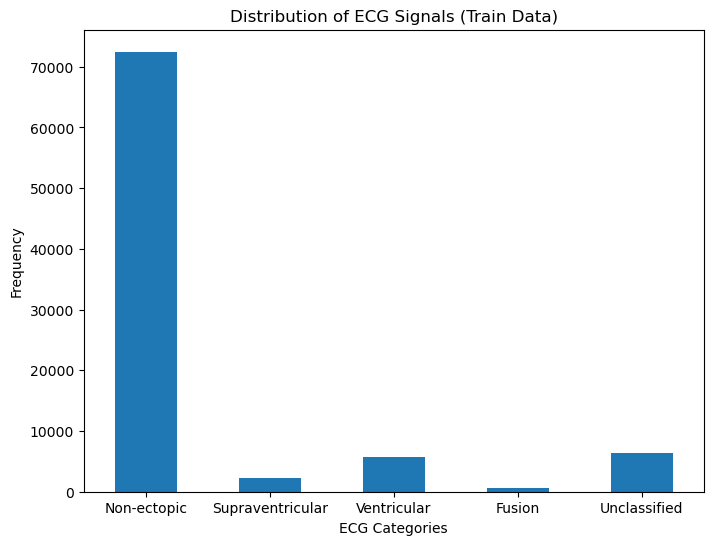

In [15]:
#Visualization
plt.figure(figsize=(8, 6))
train_target_dist.plot(kind='bar')
plt.title('Distribution of ECG Signals (Train Data)')
plt.xlabel('ECG Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

In [16]:
test_target_dist = pd.Series(np.bincount(ecg_arrh_test[187]),index=ecg_labels)

In [17]:
test_target_dist

Non-ectopic         18118
Supraventricular      556
Ventricular          1448
Fusion                162
Unclassified         1608
dtype: int64

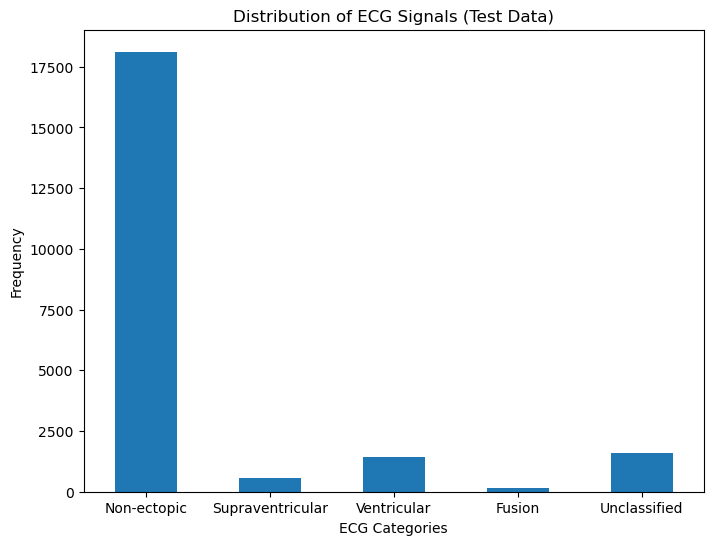

In [18]:
#Visualization
plt.figure(figsize=(8, 6))
test_target_dist.plot(kind='bar')
plt.title('Distribution of ECG Signals (Test Data)')
plt.xlabel('ECG Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

## ECG Signal Representation

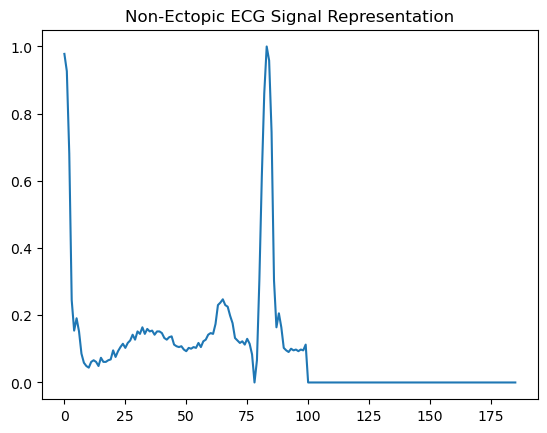

In [19]:
#ECG Signal Sample Representation
plt.plot(ecg_arrh_train.iloc[0,:186])
plt.title('Non-Ectopic ECG Signal Representation');

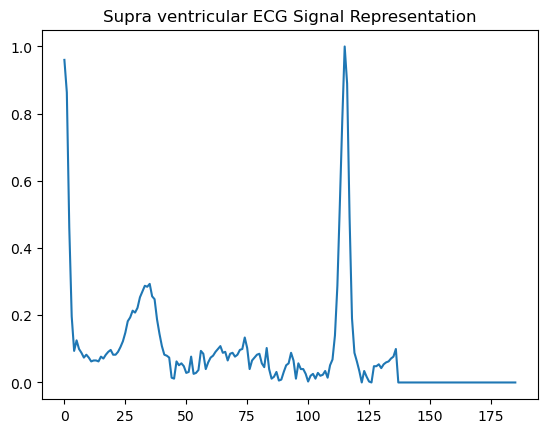

In [20]:
plt.plot(ecg_arrh_train.iloc[1,:186])
plt.title('Supra ventricular ECG Signal Representation');

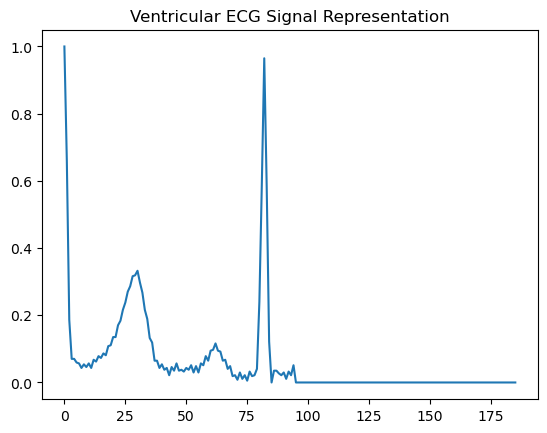

In [21]:
plt.plot(ecg_arrh_train.iloc[2,:186])
plt.title('Ventricular ECG Signal Representation');

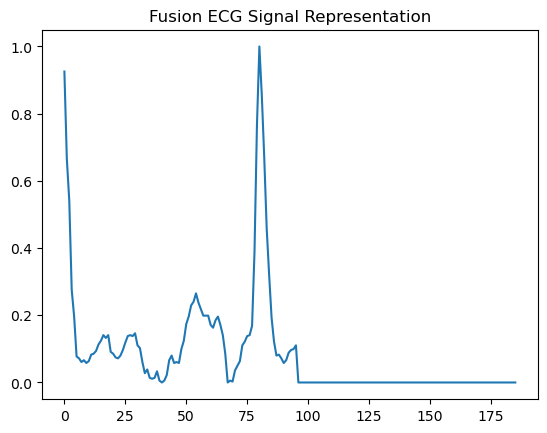

In [22]:
plt.plot(ecg_arrh_train.iloc[3,:186])
plt.title('Fusion ECG Signal Representation');

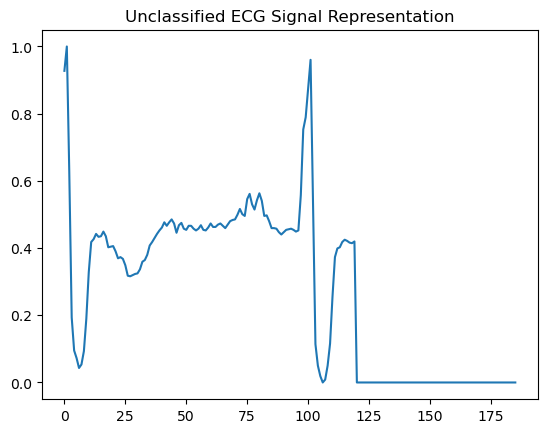

In [23]:
plt.plot(ecg_arrh_train.iloc[5,:186])
plt.title('Unclassified ECG Signal Representation');

# Data Processing

In [24]:
#Renaming the column (From numeric to alpha-numeric)
new_col = []
col_count = 1
for i in range(0, len(ecg_arrh_train.columns)):
    if col_count==188:
        new_col = new_col + ['ecg_signal']
        
    else:
        new_col = new_col + ['e'+str(col_count)]
        col_count +=1
ecg_arrh_train.columns = new_col
ecg_arrh_test.columns = new_col

In [25]:
ecg_arrh_train.head(10)

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,...,e179,e180,e181,e182,e183,e184,e185,e186,e187,ecg_signal
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
ecg_arrh_test.head(10)

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,...,e179,e180,e181,e182,e183,e184,e185,e186,e187,ecg_signal
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.797260,0.320548,0.043836,0.049315,0.065753,0.030137,0.008219,0.005479,0.010959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.909408,0.975610,0.533101,0.134146,0.066202,0.000000,0.010453,0.012195,0.031359,0.146341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.927803,0.866359,0.299539,0.000000,0.231951,0.317972,0.274962,0.262673,0.270353,0.268817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.914230,0.473684,0.000000,0.064327,0.317739,0.405458,0.391813,0.382066,0.401559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Null and Duplicates

In [27]:
print('Null in Training:',ecg_arrh_train.isnull().sum().sum())

Null in Training: 0


In [28]:
print('Null in Test:',ecg_arrh_train.isnull().sum().sum())

Null in Test: 0


In [29]:
print('Dulicates in Training:',ecg_arrh_train.duplicated().sum())

Dulicates in Training: 0


In [30]:
print('Dulicates in Test:',ecg_arrh_test.duplicated().sum())

Dulicates in Test: 0


## Changing ECG Signal datatype

In [31]:
ecg_arrh_train['ecg_signal'] = ecg_arrh_train['ecg_signal'].astype('int64')
ecg_arrh_test['ecg_signal'] = ecg_arrh_test['ecg_signal'].astype('int64')

## Features and Target in Training and Test Data

In [32]:
X_train = ecg_arrh_train.drop(['ecg_signal'], axis=1)
y_train = ecg_arrh_train['ecg_signal']
X_test = ecg_arrh_test.drop(['ecg_signal'], axis=1)
y_test = ecg_arrh_test['ecg_signal']

## Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Implementation of ML methods

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

### KNN

In [37]:
kneighbor_model = KNeighborsClassifier(n_neighbors=5)

In [38]:
kneighbor_model.fit(X_train_normalized, y_train)

KNeighborsClassifier()

In [39]:
kneighbor_pred = kneighbor_model.predict(X_test_normalized)

### AdaBoostClassifier

In [40]:
ada_model = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [41]:
ada_model.fit(X_train_normalized, y_train)

AdaBoostClassifier(learning_rate=1)

In [42]:
ada_pred = ada_model.predict(X_test_normalized)

### Decision Tree

In [43]:
tree_model = DecisionTreeClassifier()

In [44]:
tree_model.fit(X_train_normalized, y_train)

DecisionTreeClassifier()

In [45]:
tree_model_pred = tree_model.predict(X_test_normalized)

### Artificial Neural Network

In [46]:
nn_model = Sequential()

In [47]:
nn_model.add(Dense(64, activation='relu', input_dim=X_train_normalized.shape[1]))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(5, activation='softmax'))

y_train_ = to_categorical(y_train, num_classes=5)

In [48]:
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
nn_model.fit(X_train_normalized, y_train_, epochs=10, batch_size=64)

Epoch 1/10
1369/1369 [==============================] - 8s 4ms/step - loss: 0.2746 - accuracy: 0.9244
Epoch 2/10
1369/1369 [==============================] - 6s 5ms/step - loss: 0.1579 - accuracy: 0.9560
Epoch 3/10
1369/1369 [==============================] - 7s 5ms/step - loss: 0.1338 - accuracy: 0.9628
Epoch 4/10
1369/1369 [==============================] - 6s 4ms/step - loss: 0.1200 - accuracy: 0.9667
Epoch 5/10
1369/1369 [==============================] - 6s 4ms/step - loss: 0.1104 - accuracy: 0.9686
Epoch 6/10
1369/1369 [==============================] - 6s 4ms/step - loss: 0.1032 - accuracy: 0.9714
Epoch 7/10
1369/1369 [==============================] - 5s 4ms/step - loss: 0.0969 - accuracy: 0.9726
Epoch 8/10
1369/1369 [==============================] - 5s 4ms/step - loss: 0.0913 - accuracy: 0.9742
Epoch 9/10
1369/1369 [==============================] - 6s 4ms/step - loss: 0.0874 - accuracy: 0.9752
Epoch 10/10
1369/1369 [==============================] - 6s 4ms/step - loss: 0.085

In [50]:
loss, accuracy = nn_model.evaluate(X_test_normalized, to_categorical(y_test, num_classes=5))

685/685 [==============================] - 3s 3ms/step - loss: 0.1046 - accuracy: 0.9727


In [51]:
nn_pred = (nn_model.predict(X_test_normalized)).argmax(axis=1)

685/685 [==============================] - 2s 3ms/step


# Performance Evaluation

In [52]:
from sklearn.metrics import precision_score, accuracy_score, f1_score,recall_score,confusion_matrix,  classification_report

#### Confusion Matrix for KNN

In [53]:
#Confusion Matrix (KNN)
knn_matrix = confusion_matrix(y_test,kneighbor_pred)

In [54]:
print(knn_matrix)

[[18021    38    45     9     5]
 [  186   357    13     0     0]
 [  113     3  1305    23     4]
 [   43     0    16   103     0]
 [   69     0    10     0  1529]]


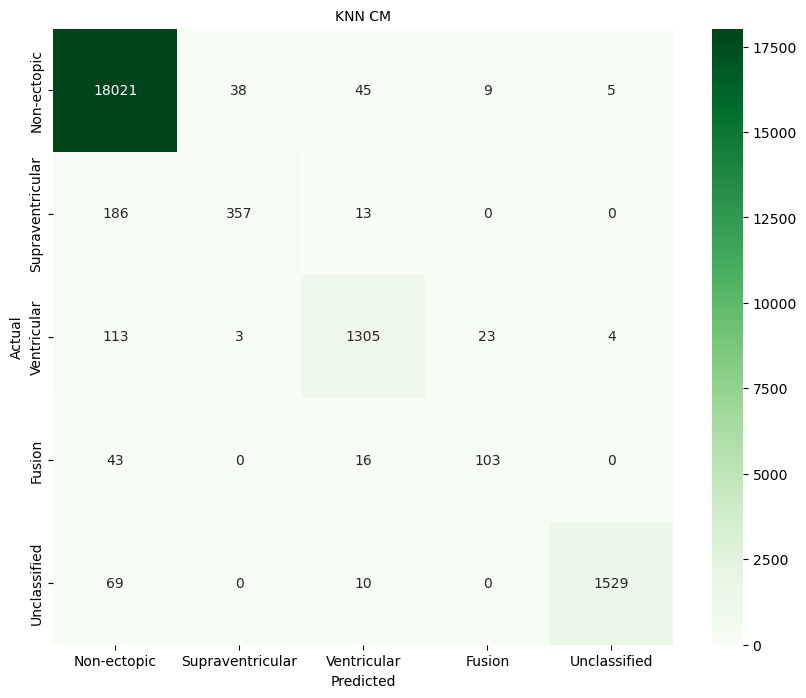

In [55]:
knn_ = pd.DataFrame(knn_matrix,ecg_labels,ecg_labels)     
plt.figure(figsize=(10,8))  
sns.heatmap(knn_, annot=True,fmt='d',cmap='Greens')
plt.title('KNN CM', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Confusion Matrix for ADA Boost

In [56]:
#Confusion Matrix (ADA Boost)
ada_matrix = confusion_matrix(y_test,ada_pred)

In [57]:
print(ada_matrix)

[[17226     7   652    13   220]
 [  524    21     5     1     5]
 [  655    15   705     3    70]
 [  153     0     8     1     0]
 [  563     0    61     0   984]]


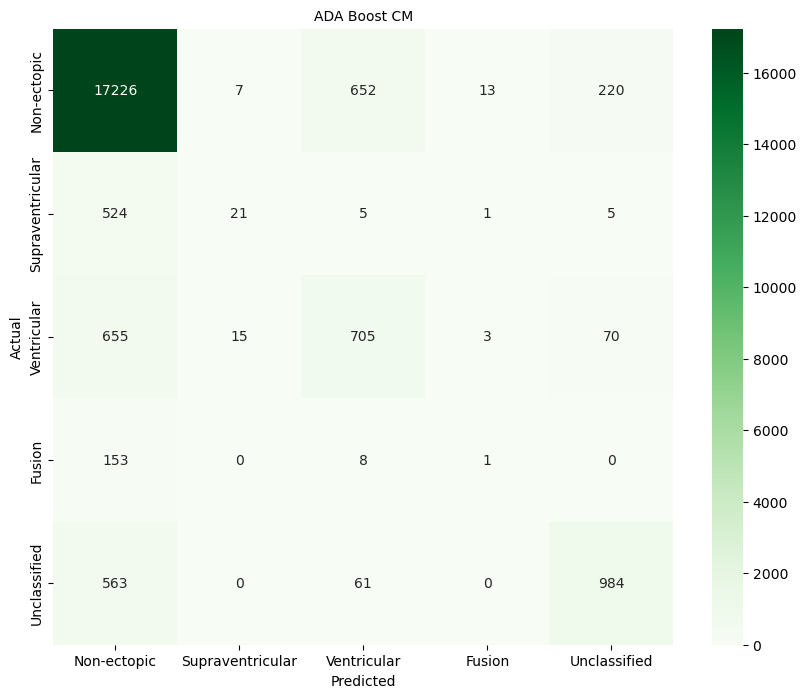

In [58]:
ada_ = pd.DataFrame(ada_matrix,ecg_labels,ecg_labels)     
plt.figure(figsize=(10,8))  
sns.heatmap(ada_, annot=True,fmt='d',cmap='Greens')
plt.title('ADA Boost CM', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Confusion Matrix for Decision  Tree

In [59]:
#Confusion Matrix (Decision Tree)
tree_matrix = confusion_matrix(y_test,tree_model_pred)

In [60]:
print(tree_matrix)

[[17668   178   150    49    73]
 [  187   352     9     2     6]
 [  135    17  1252    26    18]
 [   40     0    24    97     1]
 [   71     5    21     1  1510]]


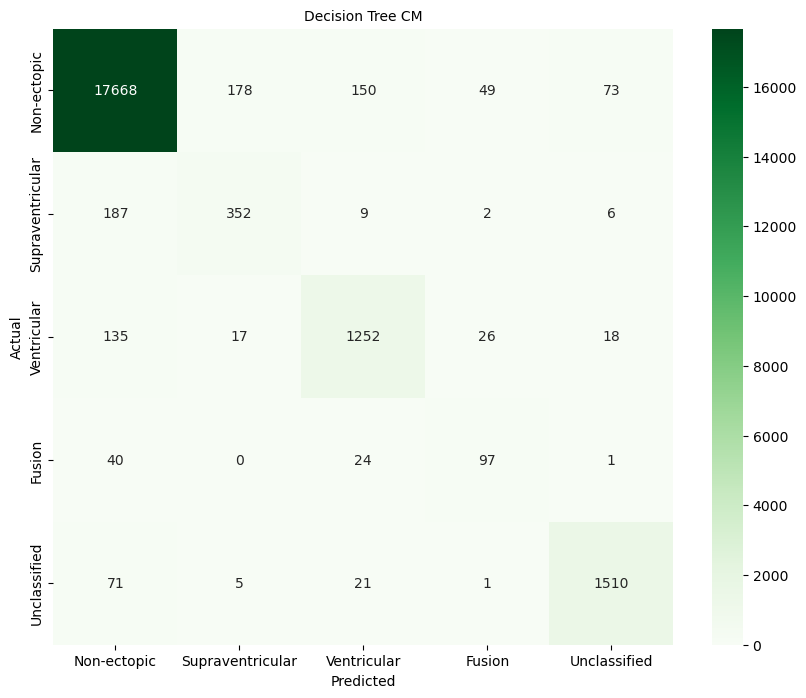

In [61]:
tree_ = pd.DataFrame(tree_matrix,ecg_labels,ecg_labels)     
plt.figure(figsize=(10,8))  
sns.heatmap(tree_, annot=True,fmt='d',cmap='Greens')
plt.title('Decision Tree CM', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Confusion Matrix for ANN

In [62]:
#Confusion Matrix (ANN)
nn_matrix = confusion_matrix(y_test,nn_pred)

In [63]:
print(nn_matrix)

[[18015    19    37     9    38]
 [  224   323     6     0     3]
 [  121     5  1287    27     8]
 [   42     0    10   110     0]
 [   40     0     8     0  1560]]


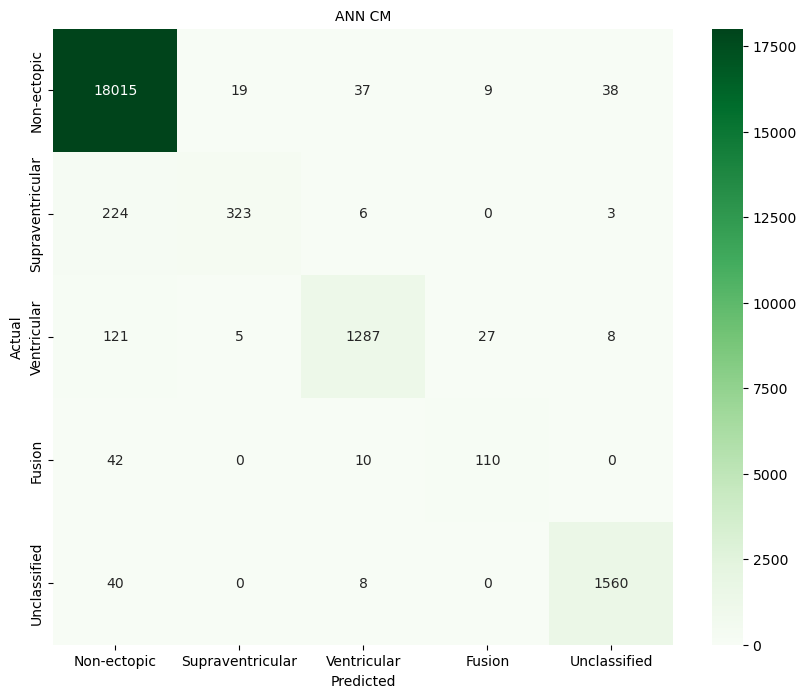

In [64]:
nn_ = pd.DataFrame(nn_matrix,ecg_labels,ecg_labels)     
plt.figure(figsize=(10,8))  
sns.heatmap(nn_, annot=True,fmt='d',cmap='Greens')
plt.title('ANN CM', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report for KNN

In [65]:
print('\t\tClassification Report for KNN \n\n\n',classification_report(y_test, kneighbor_pred))

		Classification Report for KNN 


               precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.90      0.64      0.75       556
           2       0.94      0.90      0.92      1448
           3       0.76      0.64      0.69       162
           4       0.99      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.91      0.82      0.86     21892
weighted avg       0.97      0.97      0.97     21892



#### Classification Report for ADA Boost

In [66]:
print('\t\tClassification Report for ADA Boost \n\n\n',classification_report(y_test, ada_pred))

		Classification Report for ADA Boost 


               precision    recall  f1-score   support

           0       0.90      0.95      0.93     18118
           1       0.49      0.04      0.07       556
           2       0.49      0.49      0.49      1448
           3       0.06      0.01      0.01       162
           4       0.77      0.61      0.68      1608

    accuracy                           0.87     21892
   macro avg       0.54      0.42      0.44     21892
weighted avg       0.85      0.87      0.85     21892



#### Classification Report for Decision Tree

In [67]:
print('\t\tClassification Report for Decision Tree\n\n\n',classification_report(y_test, tree_model_pred))

		Classification Report for Decision Tree


               precision    recall  f1-score   support

           0       0.98      0.98      0.98     18118
           1       0.64      0.63      0.64       556
           2       0.86      0.86      0.86      1448
           3       0.55      0.60      0.58       162
           4       0.94      0.94      0.94      1608

    accuracy                           0.95     21892
   macro avg       0.79      0.80      0.80     21892
weighted avg       0.95      0.95      0.95     21892



#### Classification Report for ANN

In [118]:
print('\t\tClassification Report for ANN \n\n\n',classification_report(y_test, nn_pred))

		Classification Report for ANN 


               precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.93      0.58      0.72       556
           2       0.95      0.89      0.92      1448
           3       0.75      0.68      0.71       162
           4       0.97      0.97      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.92      0.82      0.86     21892
weighted avg       0.97      0.97      0.97     21892



### Precision, Recall, F1-Score and Accuracy for the Models

In [69]:
knn_prec = np.round(precision_score(y_test, kneighbor_pred, average='weighted'),2)*100
knn_recall = np.round(recall_score(y_test, kneighbor_pred, average='weighted'),2)*100
knn_f1 = np.round(f1_score(y_test, kneighbor_pred, average='weighted'),2)*100
knn_acc = np.round(accuracy_score(y_test, kneighbor_pred),2)*100

In [70]:
ada_prec = np.round(precision_score(y_test, ada_pred, average='weighted'),2)*100
ada_recall = np.round(recall_score(y_test, ada_pred, average='weighted'),2)*100
ada_f1 = np.round(f1_score(y_test, ada_pred, average='weighted'),2)*100
ada_acc = np.round(accuracy_score(y_test, ada_pred),2)*100

In [71]:
tree_prec = np.round(precision_score(y_test, tree_model_pred, average='weighted'),2)*100
tree_recall = np.round(recall_score(y_test, tree_model_pred, average='weighted'),2)*100
tree_f1 = np.round(f1_score(y_test, tree_model_pred, average='weighted'),2)*100
tree_acc = np.round(accuracy_score(y_test, tree_model_pred),2)*100

In [72]:
nn_prec = np.round(precision_score(y_test, nn_pred, average='weighted'),2)*100
nn_recall = np.round(recall_score(y_test, nn_pred, average='weighted'),2)*100
nn_f1 = np.round(f1_score(y_test, nn_pred, average='weighted'),2)*100
nn_acc = np.round(accuracy_score(y_test, nn_pred),2)*100

In [73]:
ml_model_ = pd.DataFrame({'Models': ['KNN', 'ADA Boost', 'Decision Tree', 'ANN'], 
                          'Accuracy': [knn_acc, ada_acc, tree_acc, nn_acc],
                           'Precision': [ knn_prec, ada_prec, tree_prec, nn_prec],
                          'Recall': [knn_recall, ada_recall, tree_recall, nn_recall],
                          'F1-Score': [knn_f1, ada_f1, tree_f1, nn_f1]
                         })

In [74]:
print('\nModel Performance on Unbalanced Data')
ml_model_


Model Performance on Unbalanced Data


,Models,Accuracy,Precision,Recall,F1-Score
0,KNN,97.0,97.0,97.0,97.0
1,ADA Boost,87.0,85.0,87.0,85.0
2,Decision Tree,95.0,95.0,95.0,95.0
3,ANN,97.0,97.0,97.0,97.0


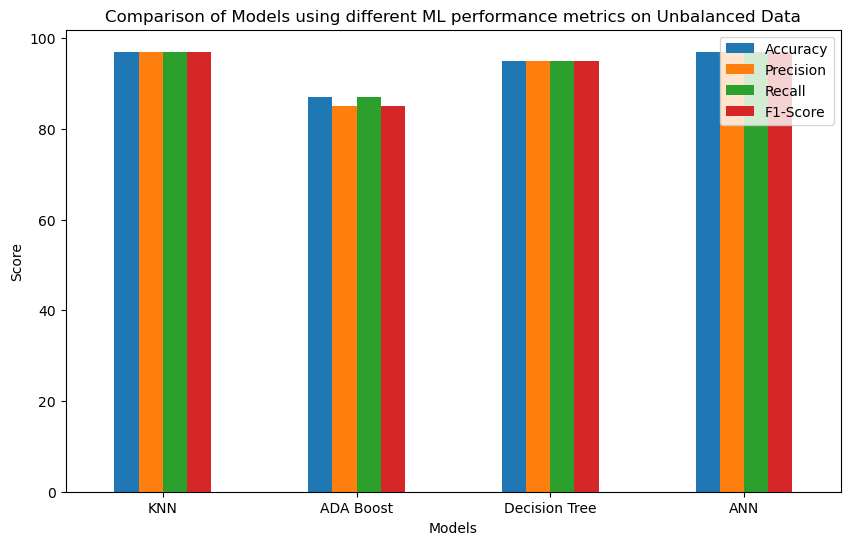

In [75]:
ml_model_.set_index('Models', inplace=True)

ml_model_.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Models using different ML performance metrics on Unbalanced Data')
plt.ylabel('Score')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# ADASYN Method

In [76]:
from imblearn.over_sampling import ADASYN

In [77]:
adasyn_model = ADASYN()

In [78]:
X_train_bal,y_train_bal=adasyn_model.fit_resample(X_train_normalized,y_train)

### Balanced Data Distribution

In [79]:
print(y_train_bal.value_counts())

2    72684
3    72486
0    72471
4    72434
1    72189
Name: ecg_signal, dtype: int64


In [80]:
bal_target_dist = pd.Series(np.bincount(y_train_bal),index=ecg_labels)

In [81]:
bal_target_dist

Non-ectopic         72471
Supraventricular    72189
Ventricular         72684
Fusion              72486
Unclassified        72434
dtype: int64

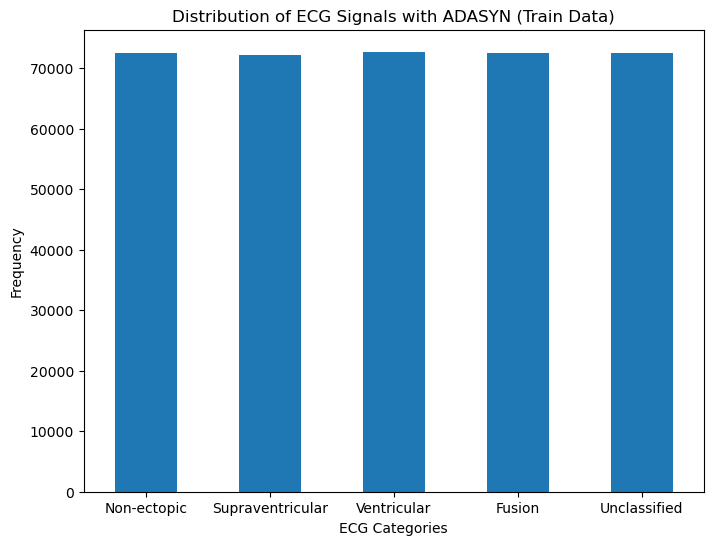

In [82]:
#Visualization
plt.figure(figsize=(8, 6))
bal_target_dist.plot(kind='bar')
plt.title('Distribution of ECG Signals with ADASYN (Train Data)')
plt.xlabel('ECG Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

# Implementation of ML Methods + ADASYN

### KNN+ADASYN

In [83]:
kneighbor_model.fit(X_train_bal,y_train_bal)

KNeighborsClassifier()

In [84]:
knn_bal_pred = kneighbor_model.predict(X_test_normalized)

### ADA Boost+ADASYN

In [85]:
ada_model.fit(X_train_bal,y_train_bal)

AdaBoostClassifier(learning_rate=1)

In [86]:
ada_bal_pred = ada_model.predict(X_test_normalized)

### Decision Tree+ADASYN

In [87]:
tree_model.fit(X_train_bal,y_train_bal)

DecisionTreeClassifier()

In [88]:
tree_bal_pred = tree_model.predict(X_test_normalized)

### ANN+ADASYN

In [89]:
n_model = Sequential()

In [90]:
n_model.add(Dense(64, activation='relu', input_dim=X_train_bal.shape[1]))
n_model.add(Dense(64, activation='relu'))
n_model.add(Dense(5, activation='softmax'))

y_train_balanced = to_categorical(y_train_bal, num_classes=5)

In [91]:
n_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
n_model.fit(X_train_bal, y_train_balanced, epochs=10, batch_size=64)

Epoch 1/10
5661/5661 [==============================] - 25s 4ms/step - loss: 0.4821 - accuracy: 0.8192
Epoch 2/10
5661/5661 [==============================] - 24s 4ms/step - loss: 0.2051 - accuracy: 0.9297
Epoch 3/10
5661/5661 [==============================] - 25s 4ms/step - loss: 0.1403 - accuracy: 0.9540
Epoch 4/10
5661/5661 [==============================] - 25s 4ms/step - loss: 0.1109 - accuracy: 0.9645
Epoch 5/10
5661/5661 [==============================] - 24s 4ms/step - loss: 0.0929 - accuracy: 0.9706
Epoch 6/10
5661/5661 [==============================] - 24s 4ms/step - loss: 0.0791 - accuracy: 0.9751
Epoch 7/10
5661/5661 [==============================] - 25s 4ms/step - loss: 0.0705 - accuracy: 0.9782
Epoch 8/10
5661/5661 [==============================] - 26s 5ms/step - loss: 0.0628 - accuracy: 0.9807
Epoch 9/10
5661/5661 [==============================] - 25s 4ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 10/10
5661/5661 [==============================] - 25s 4ms/step - l

In [93]:
n_loss, n_accuracy = n_model.evaluate(X_test_normalized, to_categorical(y_test, num_classes=5))

685/685 [==============================] - 3s 3ms/step - loss: 0.2334 - accuracy: 0.9503


In [94]:
n_pred = (nn_model.predict(X_test_normalized)).argmax(axis=1)

685/685 [==============================] - 2s 2ms/step


# Performance Evaluation (with ADASYN)

### Confusion Matrices

In [95]:
#Confusion Matrix (KNN)
knn_bal_matrix = confusion_matrix(y_test,knn_bal_pred)

In [96]:
print(knn_bal_matrix)

[[17241   470   227   108    72]
 [   70   458    19     6     3]
 [   19    17  1375    29     8]
 [   11     1    16   134     0]
 [   13     7    11     5  1572]]


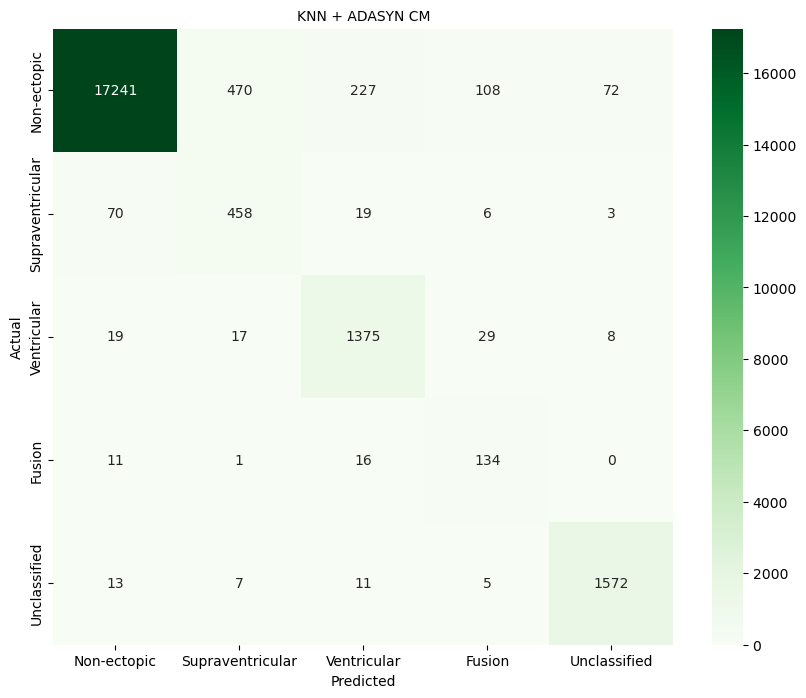

In [97]:
knn_bal_ = pd.DataFrame(knn_bal_matrix ,ecg_labels,ecg_labels)     
plt.figure(figsize=(10,8))  
sns.heatmap(knn_bal_, annot=True,fmt='d',cmap='Greens')
plt.title('KNN + ADASYN CM', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [98]:
#Confusion Matrix (ADA Boost)
ada_bal_matrix = confusion_matrix(y_test,ada_bal_pred)

In [99]:
print(ada_bal_matrix)

[[5713 6208 2773 2229 1195]
 [ 124  350   35   30   17]
 [ 145  104  817  146  236]
 [   7    8   44  102    1]
 [  19   12  164    6 1407]]


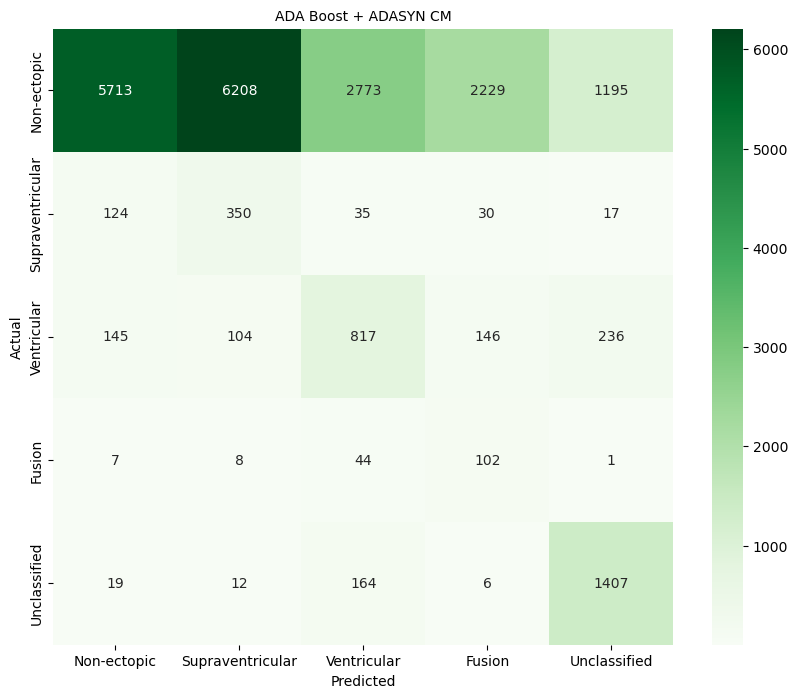

In [100]:
ada_bal_ = pd.DataFrame(ada_bal_matrix ,ecg_labels,ecg_labels)     
plt.figure(figsize=(10,8))  
sns.heatmap(ada_bal_, annot=True,fmt='d',cmap='Greens')
plt.title('ADA Boost + ADASYN CM', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [101]:
#Confusion Matrix (Decision Tree)
tree_bal_matrix = confusion_matrix(y_test,tree_bal_pred)

In [102]:
print(tree_bal_matrix)

[[17150   446   314   108   100]
 [  130   396    18     7     5]
 [  116    23  1266    32    11]
 [   27     2    15   118     0]
 [   63     6    18     3  1518]]


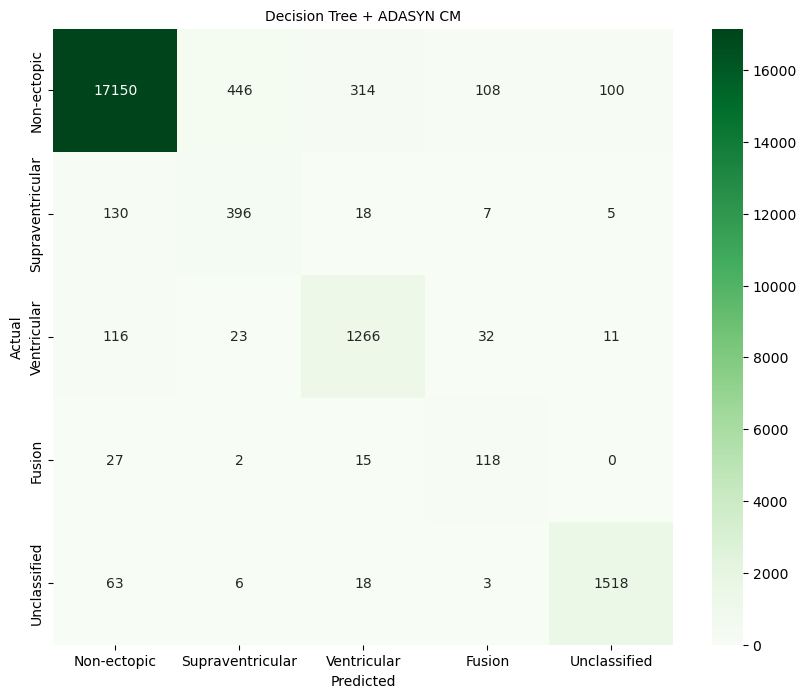

In [103]:
tree_bal_ = pd.DataFrame(tree_bal_matrix ,ecg_labels,ecg_labels)     
plt.figure(figsize=(10,8))  
sns.heatmap(tree_bal_, annot=True,fmt='d',cmap='Greens')
plt.title('Decision Tree + ADASYN CM', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [104]:
#Confusion Matrix (ANN)
n_bal_matrix = confusion_matrix(y_test,n_pred)

In [105]:
print(n_bal_matrix)

[[18015    19    37     9    38]
 [  224   323     6     0     3]
 [  121     5  1287    27     8]
 [   42     0    10   110     0]
 [   40     0     8     0  1560]]


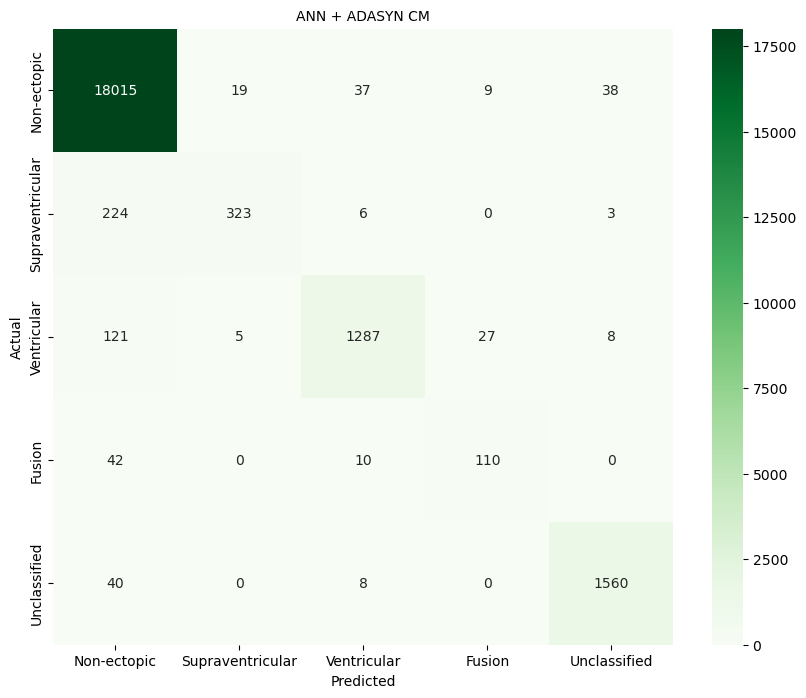

In [106]:
n_bal_ = pd.DataFrame(n_bal_matrix ,ecg_labels,ecg_labels)     
plt.figure(figsize=(10,8))  
sns.heatmap(n_bal_, annot=True,fmt='d',cmap='Greens')
plt.title('ANN + ADASYN CM', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Classification Report for KNN + ADASYN

In [107]:
print('\t\tClassification Report for KNN + ADASYN \n\n\n',classification_report(y_test, knn_bal_pred))

		Classification Report for KNN + ADASYN 


               precision    recall  f1-score   support

           0       0.99      0.95      0.97     18118
           1       0.48      0.82      0.61       556
           2       0.83      0.95      0.89      1448
           3       0.48      0.83      0.60       162
           4       0.95      0.98      0.96      1608

    accuracy                           0.95     21892
   macro avg       0.75      0.91      0.81     21892
weighted avg       0.96      0.95      0.95     21892



#### Classification Report for ADA + ADASYN

In [108]:
print('\t\tClassification Report for ADA Boost + ADASYN \n\n\n',classification_report(y_test, ada_bal_pred))

		Classification Report for ADA Boost + ADASYN 


               precision    recall  f1-score   support

           0       0.95      0.32      0.47     18118
           1       0.05      0.63      0.10       556
           2       0.21      0.56      0.31      1448
           3       0.04      0.63      0.08       162
           4       0.49      0.88      0.63      1608

    accuracy                           0.38     21892
   macro avg       0.35      0.60      0.32     21892
weighted avg       0.84      0.38      0.46     21892



#### Classification Report for Decision Tree + ADASYN

In [109]:
print('\t\tClassification Report for Decision Tree + ADASYN \n\n\n',classification_report(y_test, tree_bal_pred))

		Classification Report for Decision Tree + ADASYN 


               precision    recall  f1-score   support

           0       0.98      0.95      0.96     18118
           1       0.45      0.71      0.55       556
           2       0.78      0.87      0.82      1448
           3       0.44      0.73      0.55       162
           4       0.93      0.94      0.94      1608

    accuracy                           0.93     21892
   macro avg       0.72      0.84      0.77     21892
weighted avg       0.95      0.93      0.94     21892



#### Classification Report for ANN + ADASYN

In [110]:
print('\t\tClassification Report for ANN + ADASYN \n\n\n',classification_report(y_test, n_pred))

		Classification Report for ANN + ADASYN 


               precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.93      0.58      0.72       556
           2       0.95      0.89      0.92      1448
           3       0.75      0.68      0.71       162
           4       0.97      0.97      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.92      0.82      0.86     21892
weighted avg       0.97      0.97      0.97     21892



### Precision, Recall, F1-Score and Accuracy for the Models with ADASYN

In [111]:
knn_bal_prec = np.round(precision_score(y_test, knn_bal_pred, average='weighted'),2)*100
knn_bal_recall = np.round(recall_score(y_test, knn_bal_pred, average='weighted'),2)*100
knn_bal_f1 = np.round(f1_score(y_test, knn_bal_pred, average='weighted'),2)*100
knn_bal_acc = np.round(accuracy_score(y_test, knn_bal_pred),2)*100

In [112]:
ada_bal_prec = np.round(precision_score(y_test, ada_bal_pred, average='weighted'),2)*100
ada_bal_recall = np.round(recall_score(y_test, ada_bal_pred, average='weighted'),2)*100
ada_bal_f1 = np.round(f1_score(y_test, ada_bal_pred, average='weighted'),2)*100
ada_bal_acc = np.round(accuracy_score(y_test, ada_bal_pred),2)*100

In [113]:
tree_bal_prec = np.round(precision_score(y_test, tree_bal_pred, average='weighted'),2)*100
tree_bal_recall = np.round(recall_score(y_test, tree_bal_pred, average='weighted'),2)*100
tree_bal_f1 = np.round(f1_score(y_test, tree_bal_pred, average='weighted'),2)*100
tree_bal_acc = np.round(accuracy_score(y_test, tree_bal_pred),2)*100

In [114]:
ann_bal_prec = np.round(precision_score(y_test, n_pred, average='weighted'),2)*100
ann_bal_recall = np.round(recall_score(y_test, n_pred, average='weighted'),2)*100
ann_bal_f1 = np.round(f1_score(y_test, n_pred, average='weighted'),2)*100
ann_bal_acc = np.round(accuracy_score(y_test, n_pred),2)*100

In [115]:
ml_model_adasyn = pd.DataFrame({'Models': ['KNN', 'ADA Boost', 'Decision Tree', 'ANN'], 
                          'Accuracy': [knn_bal_acc, ada_bal_acc, tree_bal_acc, ann_bal_acc],
                           'Precision': [ knn_bal_prec, ada_bal_prec, tree_bal_prec, ann_bal_prec],
                          'Recall': [knn_bal_recall, ada_bal_recall, tree_bal_recall, ann_bal_recall],
                          'F1-Score': [knn_bal_f1, ada_bal_f1, tree_bal_f1, ann_bal_f1]
                         })

In [116]:
print('\nModel Performance on Balanced Data')
ml_model_adasyn


Model Performance on Balanced Data


,Models,Accuracy,Precision,Recall,F1-Score
0,KNN,95.0,96.0,95.0,95.0
1,ADA Boost,38.0,84.0,38.0,46.0
2,Decision Tree,93.0,95.0,93.0,94.0
3,ANN,97.0,97.0,97.0,97.0


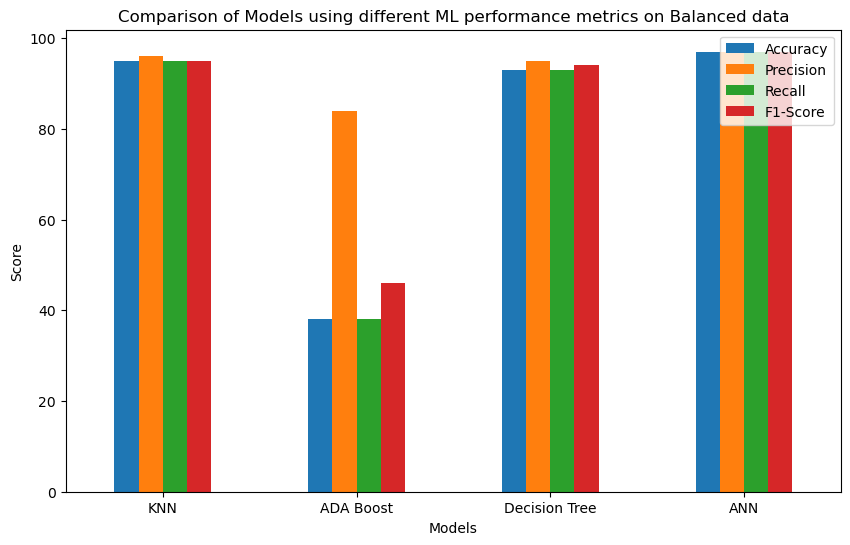

In [117]:
ml_model_adasyn.set_index('Models', inplace=True)

ml_model_adasyn.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Models using different ML performance metrics on Balanced data')
plt.ylabel('Score')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()